Задание
Цель: изучить применение методов разведочного анализа данных (EDA) для улучшения качества работы моделей машинного обучения.
Описание задания:
В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR).
Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.
5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?
6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
a. Сделайте выводы.
b. Удалите признаки на основании полученных значений, выводов.
c. Повторите п. 3, п. 4 на измененных данных.
7. Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.
b. Повторите п. 3, п. 4 на измененных данных.
8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.
9. Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.
Результат:
Получены знания по проведению разведочного анализа данных.

In [1132]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
mpl.rcParams['figure.dpi'] = 80

In [1133]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [1134]:
house_data = fetch_california_housing(as_frame=True)

In [1135]:
house_data

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [1136]:
data = pd.DataFrame(house_data.frame)
list(house_data.target_names)

['MedHouseVal']

In [1137]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [1138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [1139]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [1140]:
data['HouseAge'].value_counts()

HouseAge
52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: count, dtype: int64

Пустых значений нет, строк с непонятными значениями типа "?" или что-то подобное нет

In [1141]:
house_df = data.drop('MedHouseVal', axis=1)
y = data.MedHouseVal

In [1142]:
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [1143]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [1144]:
X_train, X_test, y_train, y_test = train_test_split(house_df, y, test_size=0.2, random_state=42)

In [1145]:
model = LinearRegression()

In [1146]:
model.fit(X_train, y_train)

LinearRegression()

In [1147]:
model.score(X_train, y_train) 

0.6125511913966952

In [1148]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1.93725845, 2.48910616, 2.64735483, ..., 2.03879912, 2.84075139,
       2.27373156])

In [1149]:
rmse = mean_squared_error(y_train, y_pred_train, squared=False) #Mean squared error regression loss.
rmse

0.7196757085831575

In [1150]:
r2 = r2_score(y_train, y_pred_train) #  (coefficient of determination) regression score function
r2

0.6125511913966952

In [1151]:
score_1 = model.score(X_test, y_test)
score_1

0.5757877060324511

In [1152]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [1153]:
rmse = mean_squared_error(y_test, y_pred_test, squared=False) #Mean squared error regression loss.
rmse

0.7455813830127761

In [1154]:
r2 = r2_score(y_test, y_pred_test) #  (coefficient of determination) regression score function
r2

0.5757877060324511

Text(0.5, 1.0, 'Target distribution')

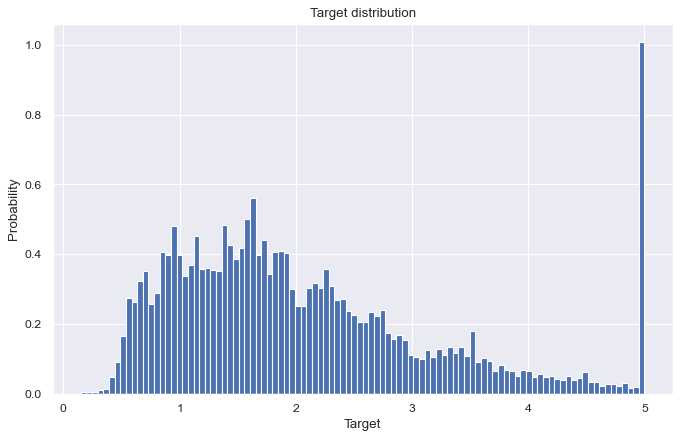

In [1155]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(y, bins=100, density=True)
ax.set_ylabel("Probability")
ax.set_xlabel("Target")
ax.set_title("Target distribution")

На графике наглядно видно выбросы, хотя в целом распределение стремится к нормальному, убрав выбросы, возможно добиться лучшего предсказания модели

In [1156]:
# можем посчитать коэффициенты корреляции между всеми показателями
house_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


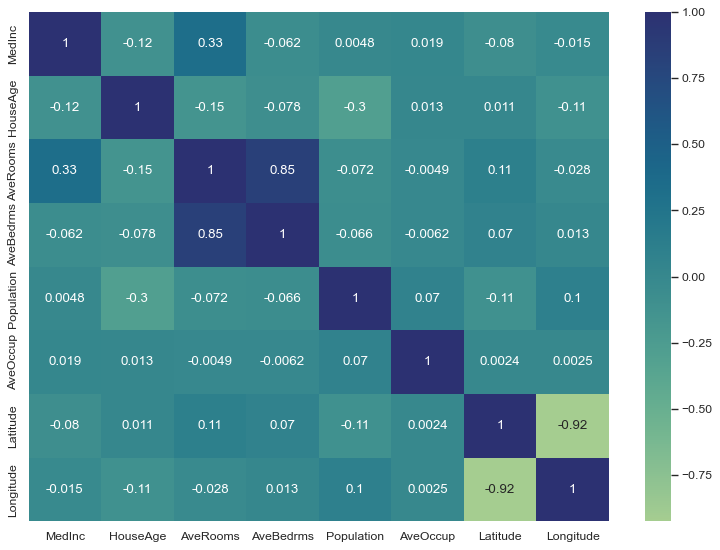

In [1157]:
# удобно визуализировать при помощи тепловой карты
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(house_df.corr(), annot=True, cmap="crest")
ax.xaxis.tick_top()

На тепловой карте, хорошо видно, что существенный вклад в определении целевых показателей осуществляет местонахождение объекта, а так же общее количество комнат, а так же количество спален. Средний доход в группе блоков, возраст дома и количество населения в блоке домов, оказывают не такое сильное влияние как предыдущие показатели, но их вклад тоже значительный.
На основе данных ваше, можем удалить не существенный признак - 'AveOccup'.

In [1158]:
Xshort = house_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Latitude', 'Longitude']]
Xshort.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,37.85,-122.25


In [1159]:
X_train_short, X_test_short, y_train, y_test = train_test_split(Xshort, y, test_size=0.2, random_state=42)

In [1160]:
model.fit(X_train_short, y_train)

LinearRegression()

In [1161]:
model.score(X_train_short, y_train)

0.6113161716418876

In [1162]:
score_2 = model.score(X_test_short, y_test)
score_2

0.5750924063350598

In [1163]:
y_pred_short1= model.predict(X_test_short)
y_pred_short1

array([0.72239921, 1.76376847, 2.69915785, ..., 4.46458783, 1.18481237,
       2.01258057])

In [1164]:
rmse_short1 = mean_squared_error(y_test, y_pred_short1, squared=False) #Mean squared error regression loss.
rmse_short1

0.7461921506296308

После удаления столбца, качество модели немного ухудшилось на тестовой выборке, а на тренировочной выборке возросла.  

In [1165]:
Xshort.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,41.950000,-114.310000


Проверим данные, т.к. дома с 142 комнатами и 34 спальнями, хоть и могут существовать, но маловероятно 

In [1166]:
Xshort['MedInc'].value_counts()

MedInc
3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: count, Length: 12928, dtype: int64

In [1167]:
Xshort.loc[Xshort['MedInc'] > 15]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude
1566,15.0001,2.0,22.222222,2.222222,25.0,37.74,-121.96
4352,15.0001,37.0,8.659574,1.425532,100.0,34.10,-118.37
4604,15.0001,52.0,8.444954,1.100917,693.0,34.06,-118.33
4605,15.0001,52.0,8.483019,0.962264,813.0,34.07,-118.33
4606,15.0001,52.0,9.204969,1.062112,531.0,34.07,-118.33
4626,15.0001,52.0,7.958333,0.833333,457.0,34.06,-118.32
4678,15.0001,52.0,8.780612,0.994898,688.0,34.08,-118.34
5242,15.0001,32.0,8.002869,1.080344,1567.0,34.11,-118.40
5247,15.0001,36.0,9.368263,1.173653,862.0,34.09,-118.44
5248,15.0001,46.0,8.365591,0.967742,238.0,34.08,-118.43


In [1168]:
Xshort['HouseAge'].sort_values()

3130      1.0
19536     1.0
12286     1.0
18972     1.0
10391     2.0
         ... 
19516    52.0
1671     52.0
15903    52.0
19525    52.0
6343     52.0
Name: HouseAge, Length: 20640, dtype: float64

In [1169]:
Xshort['AveRooms'].max()

141.9090909090909

In [1170]:
Xshort['AveRooms'].sort_values(ascending=False)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
            ...    
17820      1.130435
14818      1.130435
3126       1.000000
8219       0.888889
5916       0.846154
Name: AveRooms, Length: 20640, dtype: float64

In [1171]:
Xshort['AveBedrms'].sort_values(ascending=False)

1979     34.066667
1914     25.636364
11862    15.312500
12447    14.111111
9676     11.410714
           ...    
3125      0.500000
12138     0.500000
12649     0.444444
13606     0.375000
20248     0.333333
Name: AveBedrms, Length: 20640, dtype: float64

In [1172]:
Xshort['Population'].sort_values(ascending=False)

15360    35682.0
9880     28566.0
13139    16305.0
10309    16122.0
6057     15507.0
          ...   
18210        8.0
12286        8.0
3126         6.0
12458        5.0
5342         3.0
Name: Population, Length: 20640, dtype: float64

In [1173]:
Xshort['Longitude'].sort_values(ascending=False)

13924   -114.31
13923   -114.47
12447   -114.49
2780    -114.55
12450   -114.56
          ...  
2653    -124.26
2631    -124.27
1851    -124.30
1861    -124.30
2655    -124.35
Name: Longitude, Length: 20640, dtype: float64

Удалим выбросы из данных

In [1174]:
Xshort.drop(index = [1914, 1979, 1566], axis=0, inplace=True)
Xshort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20637 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20637 non-null  float64
 1   HouseAge    20637 non-null  float64
 2   AveRooms    20637 non-null  float64
 3   AveBedrms   20637 non-null  float64
 4   Population  20637 non-null  float64
 5   Latitude    20637 non-null  float64
 6   Longitude   20637 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


In [1175]:
y.drop(index = [1914, 1979, 1566], axis=0, inplace=True)
y.info()

<class 'pandas.core.series.Series'>
Index: 20637 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20637 non-null  float64
dtypes: float64(1)
memory usage: 322.5 KB


In [1176]:
X_train_short, X_test_short, y_train, y_test = train_test_split(Xshort, y, test_size=0.2, random_state=42)

In [1177]:
model.fit(X_train_short, y_train)

LinearRegression()

In [1178]:
model.score(X_train_short, y_train)

0.6113631358283969

In [1179]:
score_3 = model.score(X_test_short, y_test)
score_3

0.5944251631898841

In [1180]:
y_pred_short2= model.predict(X_test_short)
y_pred_short2

array([1.06402012, 2.43548496, 1.75128964, ..., 2.39499339, 2.30308409,
       0.61622502])

In [1181]:
rmse_short2 = mean_squared_error(y_test, y_pred_short2, squared=False) #Mean squared error regression loss.
rmse_short2

0.7405960415623023

После удаления выбросов, модель на тестовой выборке улучшилась почти на 2%

In [1182]:
change_df = Xshort.copy()

In [1183]:
change_df['MedInc'] = np.sqrt(change_df['MedInc'])

In [1184]:
change_df['Population'] = np.log(change_df['Population'])

In [1185]:
change_df['AveRooms'] = change_df['AveRooms']**2

In [1186]:
change_df['AveBedrms'] = change_df['AveBedrms']**2

In [1187]:
change_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,Latitude,Longitude
0,2.885342,41.0,48.778030,1.048186,5.774552,37.88,-122.23
1,2.881215,21.0,38.914354,0.944552,7.783641,37.86,-122.22
2,2.693956,52.0,68.693192,1.152287,6.206576,37.85,-122.24
3,2.375521,52.0,33.841580,1.151456,6.324359,37.85,-122.25
4,1.961173,52.0,39.461681,1.168736,6.336826,37.85,-122.25


In [1188]:
X_train_change, X_test_change, y_train, y_test = train_test_split(change_df, y, test_size=0.2, random_state=42)

In [1189]:
model.fit(X_train_change, y_train)

LinearRegression()

In [1190]:
model.score(X_train_change, y_train)

0.5930215979730056

In [1191]:
score_4 = model.score(X_test_change, y_test)
score_4

0.5672382751991694

In [1192]:
y_pred_change= model.predict(X_test_change)
y_pred_change

array([1.06947377, 2.60466386, 1.9580358 , ..., 2.59696537, 2.55890086,
       0.55889284])

In [1193]:
rmse_change= mean_squared_error(y_test, y_pred_change, squared=False) #Mean squared error regression loss.
rmse_change

0.7650156275525194

После преобразований, качество модели стало только хуже. 

In [1194]:
result = pd.DataFrame()

In [1195]:
result['Model'] = ['Model_1', 'Model_2', 'Model_3', 'Model_4']

In [1196]:
result['RMSE'] = [rmse, rmse_short1, rmse_short2, rmse_change]

In [1197]:
result['R_score'] = [score_1, score_2, score_3, score_4]

In [1198]:
result['Description'] = ['Чистые данные без обработки', 'Данные после удаления одного столбца', 'Удаление выбросов', 'Преобразование данных']

In [1199]:
result

,Model,RMSE,R_score,Description
0,Model_1,0.745581,0.575788,Чистые данные без обработки
1,Model_2,0.746192,0.575092,Данные после удаления одного столбца
2,Model_3,0.740596,0.594425,Удаление выбросов
3,Model_4,0.765016,0.567238,Преобразование данных


Обучение модели происходило на 4 различных выборках, признаки модели менялись, удаление выбросов дало лучший вариант из использованных, намеренное искажение данных, дало результат хуже, чем при сырых данных Вывод: качество данных влияет на модель линейной регрессии не сильно, т.к. разница показателей модели составила менее 3%, но на больших данных, разница может быть существенна. 